<a href="https://colab.research.google.com/github/ohyoonc/Seoul_2019_tourist_data/blob/main/04_6%EC%A1%B0_%EC%84%9C%EC%9A%B8_%EC%A3%BC%EC%9A%94_%EA%B4%80%EA%B4%91%EC%A7%80_%EB%B3%84_%EA%B4%80%EA%B4%91%EA%B0%9D_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6조 팀원 명단
- 김소정 
- 박영목
- 손다인
- 조상혁
- 전윤창

# 주제 : 서울 주요 관광지 별 관광객 수 분석

- 관광지식정보시스템 (know.tour.go.kr)
    에 나와있는 서울 주요관광지의 2019년 월별 관광객수 추이를 분석하기로 했습니다. 내국인, 외국인, 합계 dataframe을 각각 작성하여 3개를 만들었고 이를 바탕으로 다음 3가지를 시각화했습니다.

1. 2019년 N월의 내국인, 외국인 관광객수 변화
2. 관광지별 1년간 월평균 관광객수 boxplot
3. 관광지 간의 상관관계(ex. 1월에 경복궁이 사람이 많으면 아쿠아리움도 많을까?)


# Web Crawling, Pandas dataframe 만들기

In [ ]:
from bs4 import BeautifulSoup
import requests

info_url='http://know.tour.go.kr/stat/visitStatDis/statTableData.do?searchDateDivision=A&searchClass=A&searchStartYear=2019&searchEndYear=2019&searchStartMonth=01&searchEndMonth=12&searchStartQuarter=1&searchEndQuarter=1&searchBCType=&searchMCType=&searchSCType=&searchSido=1100000000&searchGungu=&searchSightsNm='
response = requests.get(info_url)
soup = BeautifulSoup(response.content, 'html.parser')
tour_spot=soup.find_all('res_nm')
tourist_type=soup.find_all('nf_gb')
cleared_spot_text=[]
b=len(tour_spot)
for i in range(0,b):
  spot_text=tour_spot[i].text
    
  state = 0
  n = len(spot_text)
  spot = ''
  for _ in range(n-2): 
    if spot_text[0] == '<' and state == 0:
      state = 1
    elif spot_text[0] == '>' and state == 1:
      state = 0
    elif state == 0:
      spot += spot_text[0]
    spot_text = spot_text[1:]
  cleared_spot_text.append(spot+'('+tourist_type[i].text+')')

#28-33행 month 부분을 반복문을 사용하여 단순화하여 표현하였음
month = list()
moon = ['01','02','03','04','05','06','07','08','09','10','11','12']
string = 'm_2019'
for i in range(12):
 mon = soup.find_all(string + moon[i])
 month.append(mon)

# 36-37행 데이터프레임 추가
import pandas as pd
d3=pd.DataFrame(index=moon)
number_of_people=[]
for i in range(0,b):
  #print('장소정보:',cleared_spot_text[i])
  for j in range(0,12):
   #print(f'{j+1}월 {tourist_type[i].text}관광객은 {(month[j])[i].text}명 입니다.')
   number_of_people.append(int((month[j])[i].text))
  #45-46행 개개의 데이터가 테이터프레임 상에서 숫자 형태로 나타나도록 수정하였음(원래 리스트or 튜플 형태로 표시되고 있었음)
  d3[cleared_spot_text[i]] = number_of_people
  number_of_people=[]

# ---------------------------- Crawaling, Pandas Dataframe End ----------------------------------

# 49-51행 cleared_spot_text는 column명의 list. (내국인), (외국인), (합계)로 구분되어 있으므로 해당 str이 포함된 column명만 추출하기로 한다.
cleared_spot_text_domestic = [] # 내국인 column명 list
cleared_spot_text_foriegner = [] # 외국인 column명 list
cleared_spot_text_sum = [] # 합계 column명 list

for x in range(len(cleared_spot_text)):
    column_name = cleared_spot_text[x]
    if column_name.endswith('(내국인)'):
        cleared_spot_text_domestic.append(column_name)
    if column_name.endswith('(외국인)'):
        cleared_spot_text_foriegner.append(column_name)
    if column_name.endswith('(합계)'):
        cleared_spot_text_sum.append(column_name)

d4 = d3[cleared_spot_text_domestic] # 내국인 dataframe
d5 = d3[cleared_spot_text_foriegner] # 외국인 dataframe
d6 = d3[cleared_spot_text_sum] # 합계 dataframe

d4


# 시각화


### 1. 2019년 N월의 내국인, 외국인 관광객수 변화
한글 폰트를 설치하고,
2019년 1년간 N월의 관광지 내국인 방문객 수 변화, 외국인 방문객 수 변화를
각각 1개의 총 2개의 면적 꺾은선 그래프로 나타내었습니다. y축이 인원수, 그리고 x축이 N월입니다.

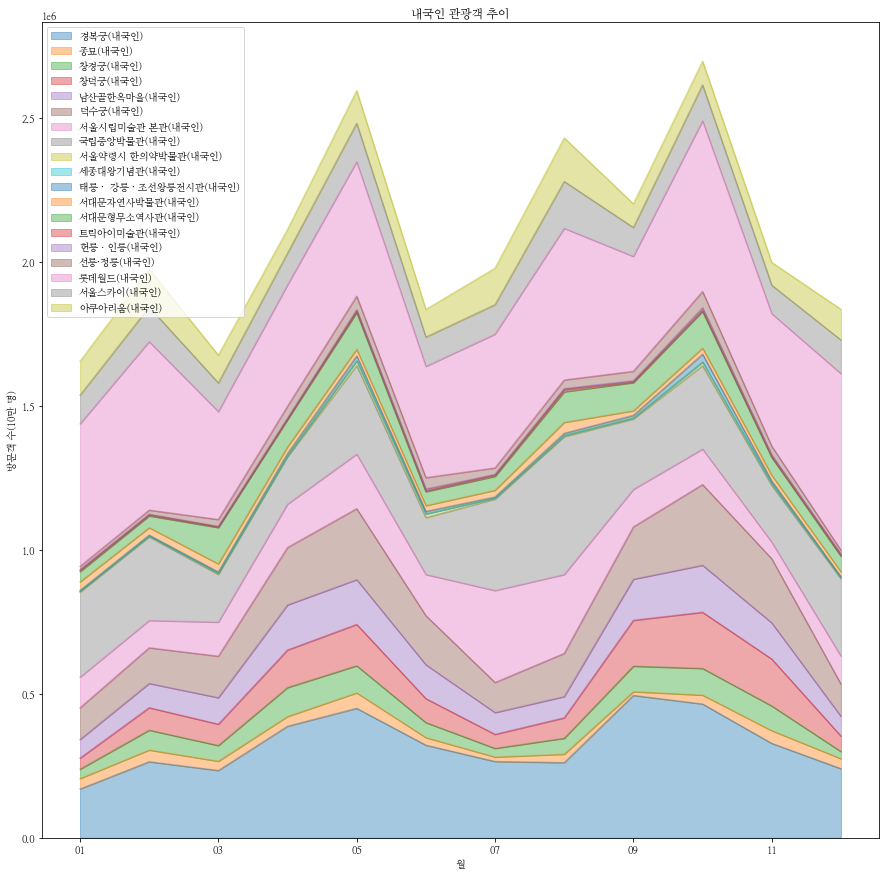

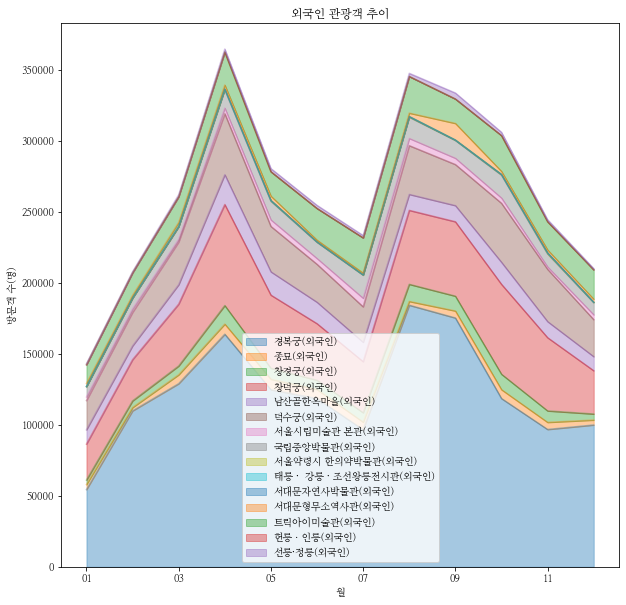

In [ ]:
!apt-get install fonts-nanum* #한글폰트 나눔을 설치
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font #모든 폰트를 출력해본다.
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl # 마이너스(-)부호가 깨지는 것을 방지하기 위함
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name) #폰트를 설정핚다.
fm._rebuild()#폰트를 적용. 그래도 폰트가 깨지면 런타임>런타임다시시작 or Kernel > Restart
mpl.rcParams['axes.unicode_minus'] = False 


#n월 관광지 내국인 방문객 수
d4.plot(kind='area', alpha=0.4)
plt.title('내국인 관광객 추이')
plt.ylabel('방문객 수(10만 명)')
plt.xlabel('월')
plt.rcParams["figure.figsize"]=(10,10)
plt.show()

#n월 관광지 외국인 방문객 수
d5.plot(kind='area', alpha=0.4)
plt.title('외국인 관광객 추이')
plt.ylabel('방문객 수(명)')
plt.xlabel('월')
plt.rcParams["figure.figsize"]=(15,15)
plt.show()

### 2. 관광지별 1년간 월평균 관광객수 boxplot

In [ ]:
# 내국인 월별

import matplotlib.pyplot as plt

d6=d4.transpose()
plt.figure(figsize=(50,40))
plt.title('서울 대표 관광지들의 월별 내국인 방문객 수')
plt.boxplot(d6,labels = cleared_spot_text_domestic)

### 3. 관광지 간의 상관관계
같은 시기에 한 관광지가 방문객이 많을 때 다른 관광지도 방문객이 많은지 그 상관관계를 분석해보고자 했습니다.
1. 창덕궁(내국인)과 아쿠아리움(내국인)
2. 경복궁(내국인)과 창경궁(내국인)
3. 서울시립미술관 본관(내국인)과 (외국인)

내국인과 외국인의 비교도 포함하기 때문에
통합 dataframe인 d3에서 column을 불러왔습니다.

1. 창덕궁(내국인)과 아쿠아리움(내국인)

상관계수 -0.68의 강한 음의 상관관계




Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


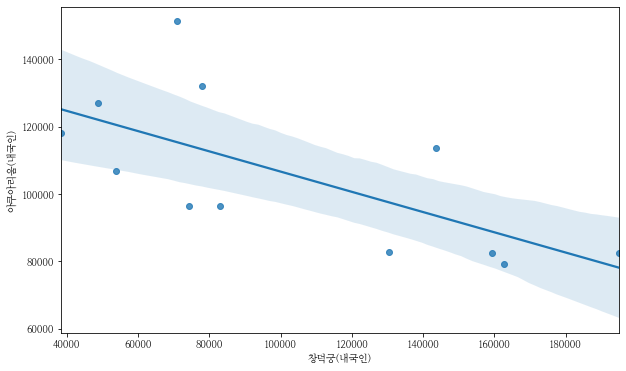

[[ 1.         -0.67612974]
 [-0.67612974  1.        ]]


In [ ]:
!apt-get install fonts-nanum* #한글폰트 나눔을 설치
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font #모든 폰트를 출력해본다.
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl # 마이너스(-)부호가 깨지는 것을 방지하기 위함
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name) #폰트를 설정핚다.
fm._rebuild()#폰트를 적용. 그래도 폰트가 깨지면 런타임>런타임다시시작 or Kernel > Restart
mpl.rcParams['axes.unicode_minus'] = False 


import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x='창덕궁(내국인)', y='아쿠아리움(내국인)', data=d3)
plt.show()


korean_with_foreign=d3
korean_with_foreign.to_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr')
df = pd.read_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr', index_col = 0)


import numpy as np
print(np.corrcoef(df['창덕궁(내국인)'], df['아쿠아리움(내국인)']))
#상관계수가 약 -0.68이므로 창덕궁과 아쿠아리움 내국인 방문자수는 강한 음(-)의 상관관계를 보인다.

2. 경복궁(내국인)과 창경궁(내국인)

상관계수 0.83의 강한 양의 상관관계


[[1.         0.82686169]
 [0.82686169 1.        ]]


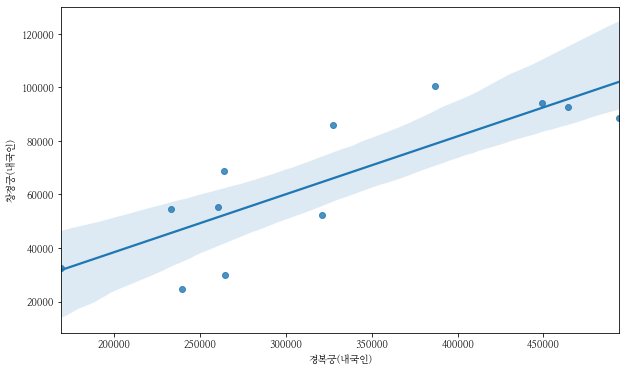

In [ ]:
korean_with_foreign=d3
korean_with_foreign.to_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr')
df = pd.read_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr', index_col = 0)

import numpy as np
print(np.corrcoef(df['경복궁(내국인)'], df['창경궁(내국인)']))




import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x='경복궁(내국인)', y='창경궁(내국인)', data=d3)
plt.show()
#상관계수가 약 0.83이므로 경복궁과 창경궁 내국인 방문자수는 매우 강한 양(+)의 상관관계를 보인다.

3. 서울시립미술관 본관(내국인)과 (외국인)

상관계수 0.87의 강한 양의 상관관계

[[1.        0.8700392]
 [0.8700392 1.       ]]


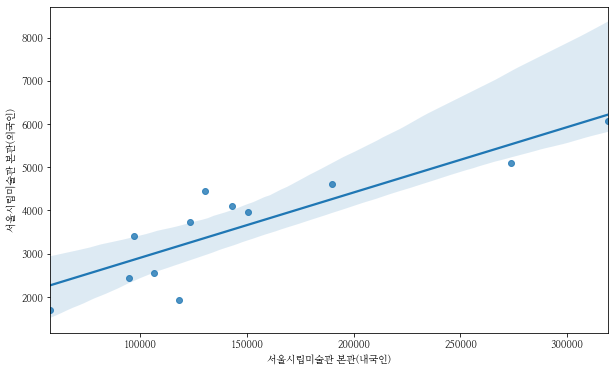

In [ ]:
korean_with_foreign=d3
korean_with_foreign.to_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr')
df = pd.read_csv('/content/korean_with_foreign.csv', encoding = 'euc-kr', index_col = 0)

import numpy as np
print(np.corrcoef(df['서울시립미술관 본관(내국인)'], df['서울시립미술관 본관(외국인)']))


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x='서울시립미술관 본관(내국인)', y='서울시립미술관 본관(외국인)', data=d3)
plt.show()
#상관계수가 약 0.87이므로 서울시립미술관 본관의 내국인과 외국인 방문자수는 매우 강한 양(+)의 상관관계를 보인다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



tourist.plot(kind='area', alpha=0.4)
plt.title('')
plt.ylabel('number of tourists')
plt.xlabel('year')
plt.rcParams["figure.figsize"]=(10,10)
plt.show()